In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

<h4> <u> <a> Data Processing

In [62]:
#load the data

names= ["X1","X2","class"]
data =pd.read_csv("demo_data/knn/3.concertriccir2.csv",names = names)
print(data.head())

         X1        X2  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


In [63]:
# Bifercate data into X and y
X= data.iloc[:,[0,1]].to_numpy()
y= data.iloc[:,2].to_numpy()

<a><h4><u> Splitting the Data

In [64]:
#checking size of X and y
print(X.shape,y.shape)

# splits into train set then test set
X_1, X_test, y_1, y_test = train_test_split(X,y,random_state=1,test_size=0.2)

#using random_sate !=0 will give you same results again
#test_size=0.3 means that you are having test data  = 30%

#Split the train data into Cross validation train and test
# we will identify best k from here and use it to compute error on X_test

X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, random_state=1, test_size=0.2)


(500, 2) (500,)


<a><h4><u> Simple Cross Validation

In [101]:
for k  in range(1,30,2):

    knn=KNeighborsClassifier(n_neighbors=k)

    #fitting the model on Train
    knn.fit(X_train,y_train)

    #predict the response on the CV_train
    pred=knn.predict(X_cv)

    #evalute CV accuracy
    cv_acc = accuracy_score(y_cv,pred,normalize= True)*float(100)

    #If normalize == True, return the fraction of correctly classified samples (float), 
    #else returns the number of correctly classified samples (int) value.

    print("Accuracy for k= {0} is {1} % ".format(k,cv_acc))

Accuracy for k= 1 is 95.0 % 
Accuracy for k= 3 is 92.5 % 
Accuracy for k= 5 is 92.5 % 
Accuracy for k= 7 is 90.0 % 
Accuracy for k= 9 is 85.0 % 
Accuracy for k= 11 is 86.25 % 
Accuracy for k= 13 is 85.0 % 
Accuracy for k= 15 is 82.5 % 
Accuracy for k= 17 is 81.25 % 
Accuracy for k= 19 is 81.25 % 
Accuracy for k= 21 is 78.75 % 
Accuracy for k= 23 is 78.75 % 
Accuracy for k= 25 is 76.25 % 
Accuracy for k= 27 is 75.0 % 
Accuracy for k= 29 is 72.5 % 


In [102]:
'''we used k=1 because from CV test we saw K=1 will be best for us'''

best_k=1
knn = KNeighborsClassifier(n_neighbors=best_k)

#Test complete X_train on unseen y_train
knn.fit(X_train,y_train)

#
pred = knn.predict(X_test)
final_acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print("Final Accuracy on training data with k= {0} is {1} % ".format(best_k,final_acc))

Final Accuracy on training data with k= 1 is 82.0 % 


<u>Conclusion </u> - The accuracy is very poor , and if we check for all k on this test. data.accuracy_score
we will see k=2 has more accuracy than k=1.

To solve this issue we will use cross fold validation. 

<a><h4><u> K-fold Cross Validation

<u>1. Old method (Basic)

In [109]:
#creating odd list of K for KNN
"""or simply neigbours = list(range(1,50,2))"""

myList = list(range(1,50,2))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

#Filter(func,list) returns a list where function returns true 

#no of folds
folds=10

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:

    knn=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(knn,X_train, y_train, cv=folds, scoring='accuracy')
    # no of folds= 10
    # scores will contain a list of accuracy for all the 10 folds
    # we only need mean of that accurarcy for each k
    cv_scores.append(scores.mean())

## changing to misclassification error(mean squared error)
#list comprehension
MSE = [1 - x for x in cv_scores]

#determining best k 

min_fold_error = min(MSE)
index_min_fold_error = MSE.index(min_fold_error)

#this give optimal k for which error was lowest
optimal_k = neighbors[index_min_fold_error]

"""optimal_k = neighbors[MSE.index(min(MSE))]"""

print("Optimal k(no of neighbours) for no of folds={0} is k= {1}".format(folds,optimal_k))
print("Error Array = ",MSE)

Optimal k(no of neighbours) for no of folds=10 is k= 3
Error Array =  [0.13437500000000002, 0.11562499999999998, 0.12812500000000004, 0.12187499999999996, 0.16249999999999998, 0.15625, 0.171875, 0.16562500000000002, 0.17812499999999998, 0.19062500000000004, 0.19687500000000002, 0.21562499999999996, 0.22187500000000004, 0.23124999999999996, 0.24062499999999998, 0.27812499999999996, 0.296875, 0.30000000000000004, 0.31875, 0.328125, 0.33125000000000004, 0.328125, 0.34375, 0.34687500000000004, 0.353125]


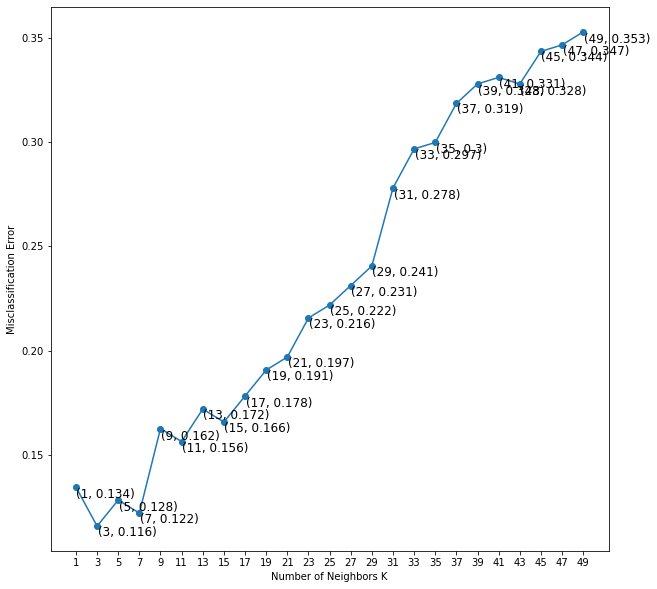

In [112]:
#plot Error vs k with annotation
plt.figure(figsize=(10,10))

#for lines
plt.plot(neighbors,MSE)

#for dots
plt.scatter(neighbors,MSE)

#change the gaps in xaxis
plt.xticks(neighbors)

for x,y in zip(neighbors,np.round(MSE,3)):
    plt.text(x+0.05,y-0.005, '({}, {})'.format(x, y),fontsize=12)

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()



In [113]:
#-------> with k = optimal_k <--------#

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

#fitting the model
knn_optimal.fit(X_train, y_train)

#predict the response
pred = knn_optimal.predict(X_test)

#evaluate accuracy
final_acc=accuracy_score(y_test , pred ) *float(100)

print('\nThe accuracy of the knn classifier for k = {0} is {1}%'.format(optimal_k, final_acc))


The accuracy of the knn classifier for k = 3 is 86.0%
